In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import datetime
import pytz 
from tzwhere import tzwhere
import math
from suntime import Sun
import scipy as sci
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import cdo
from matplotlib.colors import LinearSegmentedColormap

In [6]:
URB_21 = xr.open_dataset('/data/hubhome/s6mabohm/Masterarbeit/fc_DOM01_0003_URB_urban_grid_URB21.nc')
URB_22 = xr.open_dataset('/data/hubhome/s6mabohm/Masterarbeit/fc_DOM01_0003_URB_urban_grid_URB22.nc')

OPR_21 = xr.open_dataset('/data/hubhome/s6mabohm/Masterarbeit/fc_DOM01_0003_OPR_urban_grid_OPR21.nc')
OPR_22 = xr.open_dataset('/data/hubhome/s6mabohm/Masterarbeit/fc_DOM01_0003_OPR_urban_grid_OPR22.nc')

In [71]:
print(OPR_21.T_2M.mean().values)
print(URB_21.T_2M.mean().values)

294.16373
295.31183


In [72]:
print(OPR_22.T_2M.mean().values)
print(URB_22.T_2M.mean().values)

292.99463
294.17853


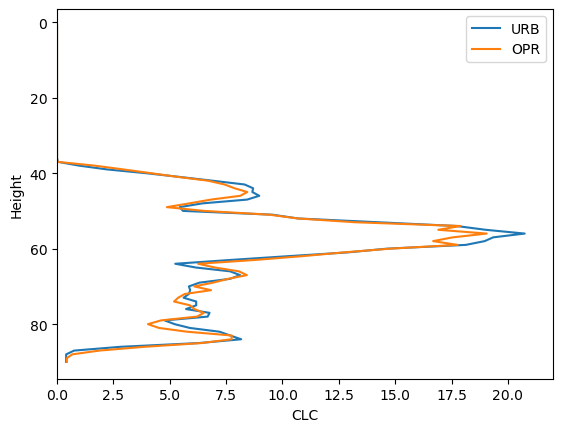

In [7]:
average_URB_CLC_values_21 = URB_21.CLC.mean(dim='cell').values.T
average_URB_height_21 = URB_21.CLC.height

average_OPR_CLC_values_21 = OPR_21.CLC.mean(dim='cell').values.T
average_OPR_height_21 = OPR_21.CLC.height

plt.plot(average_URB_CLC_values_21, average_URB_height_21, label='URB')
plt.plot(average_OPR_CLC_values_21, average_OPR_height_21, label='OPR')

plt.gca().invert_yaxis()

plt.xlabel('CLC')
plt.ylabel('Height')
plt.legend()
plt.xlim(0,22)
plt.show()

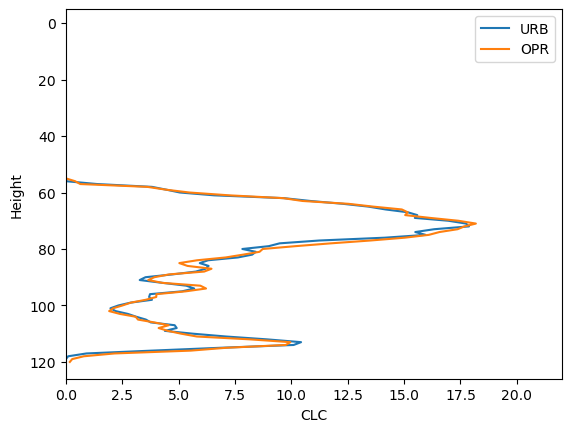

In [13]:
average_URB_CLC_values_22 = URB_22.CLC.mean(dim='cell').values.T
average_URB_height_22 = URB_22.CLC.height

average_OPR_CLC_values_22 = OPR_22.CLC.mean(dim='cell').values.T
average_OPR_height = OPR_22.CLC.height

plt.plot(average_URB_CLC_values_22, average_URB_height_22 , label='URB')
plt.plot(average_OPR_CLC_values_22, average_URB_height_22 , label='OPR')

plt.gca().invert_yaxis()

plt.xlabel('CLC')
plt.ylabel('Height')
plt.legend()
plt.xlim(0,22)

plt.show()


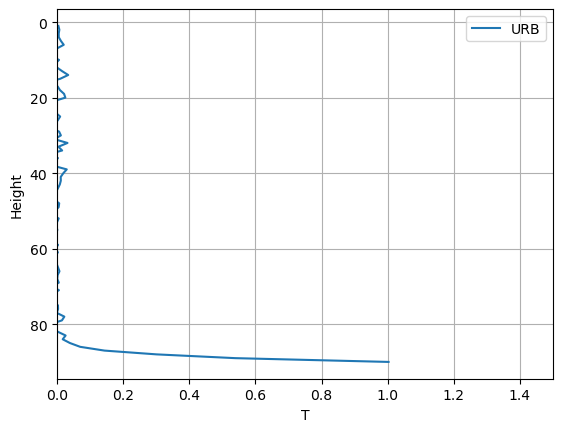

In [14]:
average_URB_T_values_21 = URB_21.T.mean(dim='cell').values.T
average_URB_height_21 = URB_21.T.height

average_OPR_T_values_21 = OPR_21.T.mean(dim='cell').values.T
average_OPR_height_21 = OPR_21.T.height

plt.plot(average_URB_T_values_21 - average_OPR_T_values_21, average_URB_height_21, label='URB')
#plt.plot(average_OPR_T_values_21, average_OPR_height_21, label='OPR')

plt.gca().invert_yaxis()
plt.grid()
plt.xlim(0,1.5)

plt.xlabel('T')
plt.ylabel('Height')
plt.legend()
plt.show()

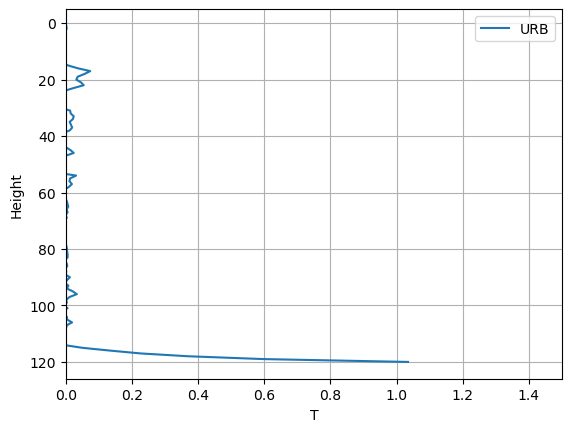

In [15]:
average_URB_T_values_22 = URB_22.T.mean(dim='cell').values.T
average_URB_height_22 = URB_22.T.height

average_OPR_T_values_22 = OPR_22.T.mean(dim='cell').values.T
average_OPR_height_22 = OPR_22.T.height

plt.plot(average_URB_T_values_22 - average_OPR_T_values_22, average_URB_height_22, label='URB')
#plt.plot(average_OPR_T_values_22, average_OPR_height_22, label='OPR')

plt.gca().invert_yaxis()
plt.grid()
#plt.xlim(280,300,5)
plt.xlim(0,1.5)

plt.xlabel('T')
plt.ylabel('Height')
plt.legend()
plt.show()

In [16]:
URB_22.T_2M.mean() - OPR_22.T_2M.mean()

<xarray.DataArray 'T_2M' ()>
array(1.1838989, dtype=float32)

In [17]:
URB_21.T_2M.isel(cell=74).mean() - OPR_21.T_2M.isel(cell=74).mean()

<xarray.DataArray 'T_2M' ()>
array(0.9827881, dtype=float32)
Coordinates:
    clon     float64 0.2327
    clat     float64 0.9166

In [48]:
np.rad2deg(URB_21.T_2M.isel(cell=75).clat.values)

52.18166362367598

In [49]:
np.rad2deg(URB_21.T_2M.isel(cell=75).clon.values)

20.970979839573303

In [58]:
OPR_21.T_2M.isel(cell=74).values

array([[292.59552]], dtype=float32)

In [50]:
URB_21.T_2M.isel(cell=75).mean() - OPR_21.T_2M.isel(cell=75).mean()

<xarray.DataArray 'T_2M' ()>
array(1.6937256, dtype=float32)
Coordinates:
    clon     float64 0.366
    clat     float64 0.9107

In [53]:
URB_21

<xarray.Dataset>
Dimensions:       (cell: 247, nv: 3, height: 90, bnds: 2, depth_2: 8, plev: 1,
                   plev_2: 1, plev_3: 1, time: 1, height_2: 1, height_3: 1,
                   depth: 9)
Coordinates:
  * time          (time) datetime64[ns] 2021-07-05T21:00:00
    clon          (cell) float64 ...
    clat          (cell) float64 ...
  * height        (height) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
  * height_2      (height_2) float64 2.0
  * height_3      (height_3) float64 10.0
  * depth         (depth) float64 0.0 0.005 0.02 0.06 0.18 0.54 1.62 4.86 14.58
  * depth_2       (depth_2) float64 0.0 0.01 0.03 0.09 0.27 0.81 2.43 7.29
  * plev          (plev) float64 8e+04
  * plev_2        (plev_2) float64 4e+04
  * plev_3        (plev_3) float64 0.0
Dimensions without coordinates: cell, nv, bnds
Data variables: (12/70)
    clon_bnds     (cell, nv) float64 ...
    clat_bnds     (cell, nv) float64 ...
    height_bnds   (height, bnds, cell) float64 ...
    depth_2_bnds  (depth_2, bnds, cell) float64 ...
    plev_bnds     (plev, bnds, cell) float64 ...
    plev_2_bnds   (plev_2, bnds, cell) float64 ...
    ...            ...
    CLCH          (time, plev_3, cell) float32 ...
    QV_DIA        (time, height, cell) float32 ...
    QC_DIA        (time, height, cell) float32 ...
    QI_DIA        (time, height, cell) float32 ...
    code255       (time, height, cell) float32 ...
    CLC           (time, height, cell) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CDI:                  Climate Data Interface version 2.1.1 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  26
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/ic...
    uuidOfHGrid:          a27b8de6-18c4-11e4-820a-b5b098c6a5c0
    uuidOfVGrid:          040fc503-4e8d-b79c-50db-d22bc9152e60
    institution:          Deutscher Wetterdienst
    history:              Mon Apr 15 17:38:15 2024: cdo -setgrid,/p/scratch/d...
    CDO:                  Climate Data Operators version 2.1.1 (https://mpime...

/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


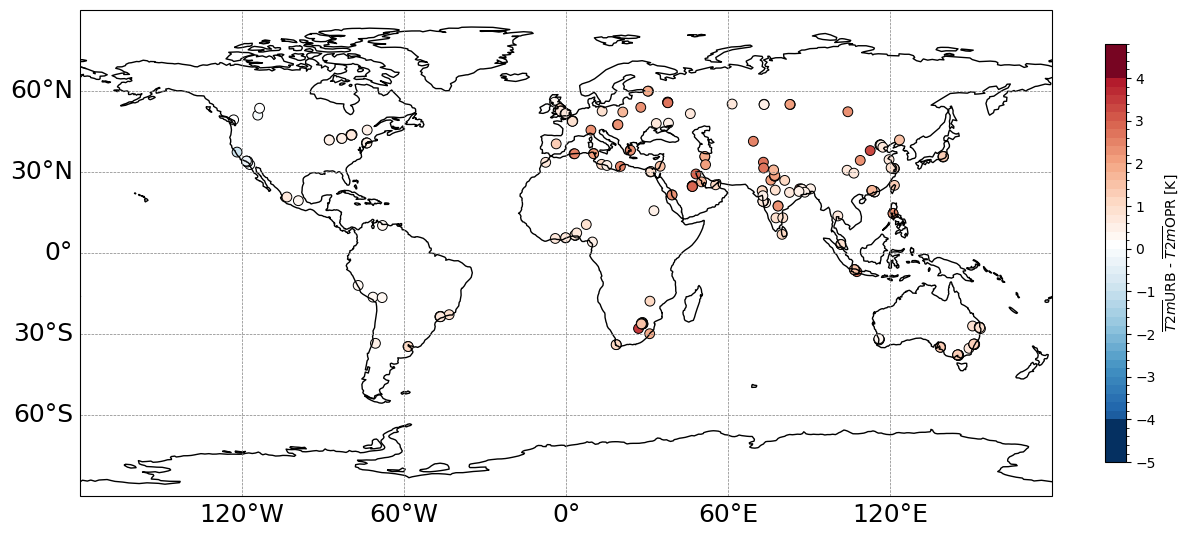

In [23]:
#define a color map for the plot later

colors_orig = [ (103,0,31),(178,24,43),(214,96,77),(244,165,130),(253,219,199),(255,255,255),(209,229,240),(146,197,222),(67,147,195),(33,102,172),(5,48,97)]
colorsm=[[a/255. for a in x] for x in colors_orig]
div_color= LinearSegmentedColormap.from_list( 'div_color', colorsm, N=49)
level=np.arange(-5,5,.2) #-.6,.5,.05)  #
bounds=level.tolist()
cmap = div_color
cmaplist = [cmap(i) for i in range(cmap.N,0,-1)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plotting
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

sc = ax.scatter(np.rad2deg(URB_22['clon']), np.rad2deg(URB_22['clat']), c=URB_21.T_2M - OPR_21.T_2M, cmap=cmap,
                norm=norm, transform=ccrs.PlateCarree(), s=50, alpha=1, edgecolors='black', linewidths=.7)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical',
                    label='$\overline{T2m}$URB - $\overline{T2m}$OPR [K]',
                    fraction=0.02)
cbar.set_ticks(np.arange(-5, 5.5, 1))  # Adjust ticks for better visibility

sc.set_clim(-4, 4)

ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5, color='gray')
gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style, gl.ylabel_style = {'fontsize': 18}, {'fontsize': 18}

plt.tight_layout()
#plt.savefig('../plots_2024/world_map_mean_differences_2022.png', dpi=300)


In [35]:
diff_22 = (URB_22.T_2M - OPR_22.T_2M) 
diff_21 = (URB_21.T_2M - OPR_21.T_2M) 

/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda3/envs/py39-cartopy/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


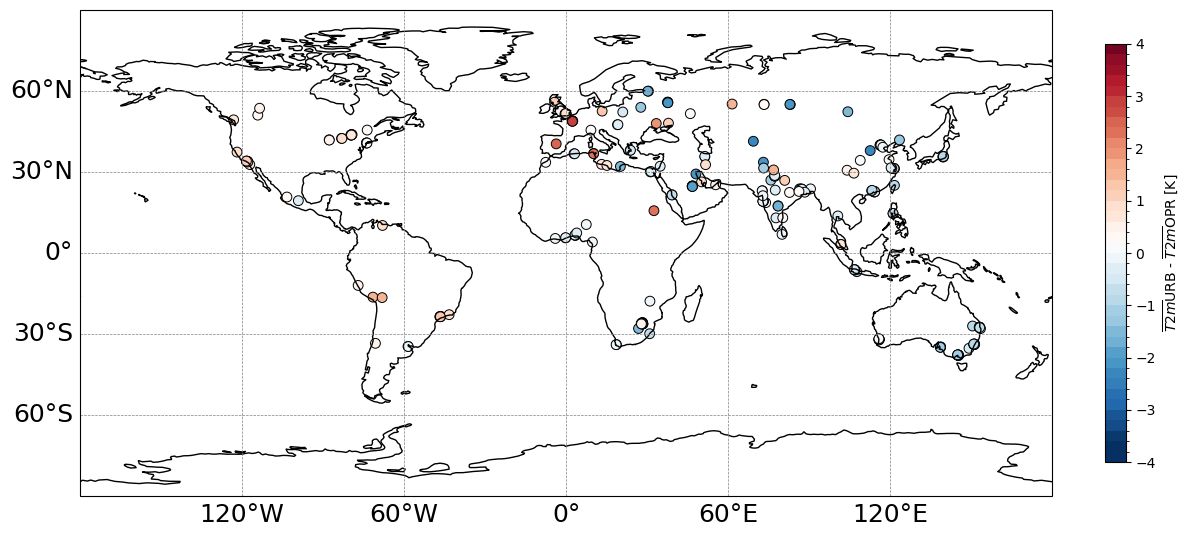

In [43]:
#define a color map for the plot later

colors_orig = [ (103,0,31),(178,24,43),(214,96,77),(244,165,130),(253,219,199),(255,255,255),(209,229,240),(146,197,222),(67,147,195),(33,102,172),(5,48,97)]
colorsm=[[a/255. for a in x] for x in colors_orig]
div_color= LinearSegmentedColormap.from_list( 'div_color', colorsm, N=59)
level=np.arange(-4,4.1,.2) #-.6,.5,.05)  #
bounds=level.tolist()
cmap = div_color
cmaplist = [cmap(i) for i in range(cmap.N,0,-1)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plotting
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

sc = ax.scatter(np.rad2deg(URB_22['clon']), np.rad2deg(URB_22['clat']), c=diff_22.values - diff_21.values, cmap=cmap,
                norm=norm, transform=ccrs.PlateCarree(), s=50, alpha=1, edgecolors='black', linewidths=.7)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical',
                    label='$\overline{T2m}$URB - $\overline{T2m}$OPR [K]',
                    fraction=0.02)
cbar.set_ticks(np.arange(-5, 5.5, 1))  # Adjust ticks for better visibility

sc.set_clim(-4, 4)

ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5, color='gray')
gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style, gl.ylabel_style = {'fontsize': 18}, {'fontsize': 18}

plt.tight_layout()
#plt.savefig('../plots_2024/world_map_mean_differences_2022.png', dpi=300)
